In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from os.path import join

In [2]:
plt.style.use("seaborn-v0_8-deep")
params = {"ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "text.usetex" : True,
        "font.family" : "serif",
        "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

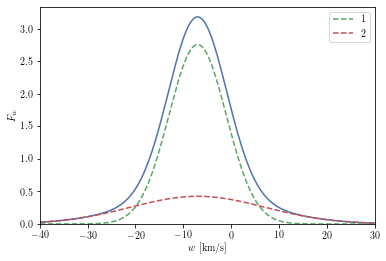

In [3]:
w = np.linspace(-40, 30, 1000)

w0 = -7
sigmaw1 = 6
sigmaw2 = 14
a1 = 4
a2 = 1
phi_b = np.exp(4)

def f0(w, theta):
    w0, sigmaw1, sigmaw2, a1, a2, _ = theta
    return a1 * np.exp(-(w - w0)**2 / (2 * sigmaw1**2)) + a2 * np.exp(-(w - w0)**2 / (2 * sigmaw2**2))

wb = np.sign(w) * np.sqrt((w-w0)**2 + 2*phi_b)
y1 = a1 * (stats.norm.pdf(w, w0, sigmaw1) + stats.norm.pdf(wb, 0, sigmaw1))
y2 = a2 * (stats.norm.pdf(w, w0, sigmaw2) + stats.norm.pdf(wb, 0, sigmaw2))
y01 = a1 * (stats.norm.pdf(w0, w0, sigmaw1) + stats.norm.pdf(0, 0, sigmaw1))
y02 = a2 * (stats.norm.pdf(w0, w0, sigmaw2) + stats.norm.pdf(0, 0, sigmaw2))
atot = a1 + a2
y = (y1 + y2)/(y01 + y02)*atot

plt.plot(w, y)
plt.plot(w, y1/(y02+y01)*atot, label='1', linestyle='--')
plt.plot(w, y2/(y02+y01)*atot, label='2', linestyle='--')
plt.xlabel(r'$w$ [km/s]')
plt.ylabel(r'$F_w$')
plt.legend()
plt.xlim(-40, 30)
plt.ylim(0)
# plt.yscale('log')
plt.savefig(join("img", "w.pdf"), dpi=70)
plt.show()